# Data Science Lab Winter 2024 project

This is the winter 2023/2024 project exam for the "Data Science Lab: Process and methods" course at Politecnico di Torino.

Authors: Alex Vellone and Michele Moneta.

For this project we did not use any Large Language Models (e.g. ChatGPT).
Only our brain, stackoverflow and some inspiration from lab9 ;)

Source: https://github.com/vellons/polito-ds-lab-exercises/tree/main/exam

## 1. Project dates

Start date: January 5, 2023 at 23:59 (CET) 

Due date: January 26, 2023 at 23:59 (CET)

## 2. Problem description

Within the field of particle physics, a long-standing task of interest is detecting the positions where particles (e.g., electrons) pass in their trajectories. Some sensors are capable of detecting the passage of these particles and, following that, the position of the particles themselves. One such sensor is the RSD (Resistive Silicon Detector). This sensor has a 2-dimensional surface within which it can detect the passage of particles. Figure 1 shows an example of such a detector.

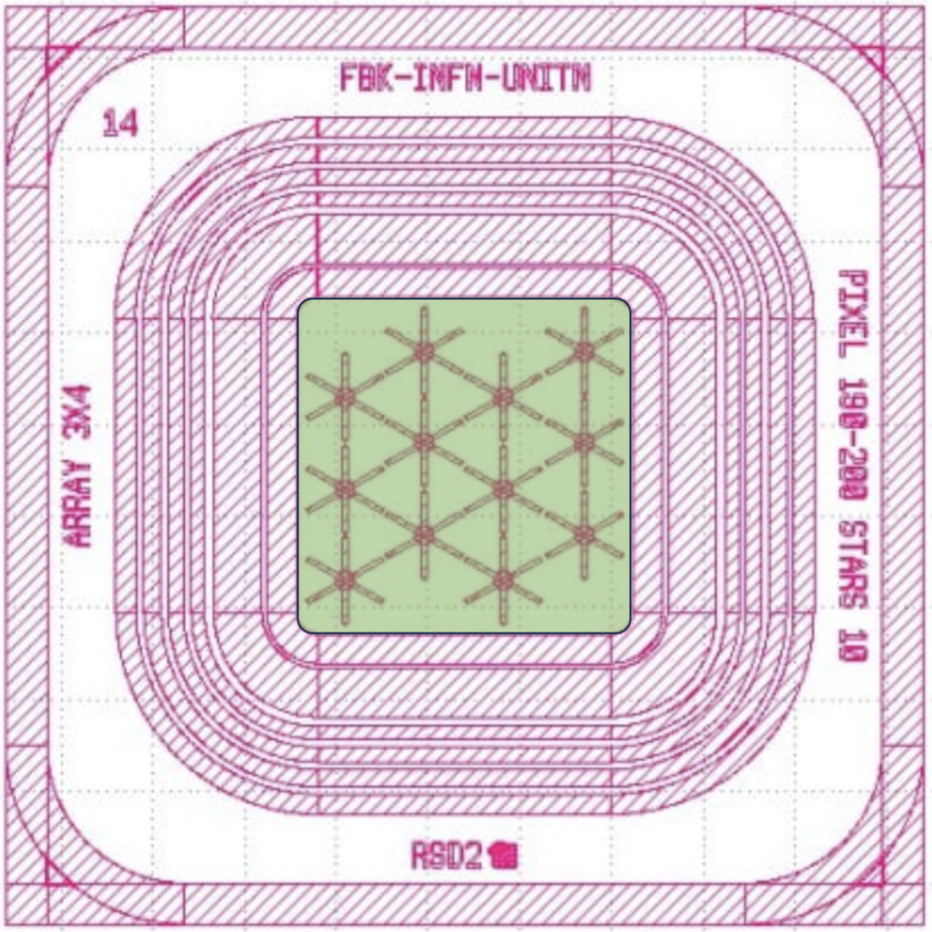

Figure 1: Example of a detector. The detector can observe a particle passing through the green area by measuring signals on the asterisk-shaped pads.

When a particle passes through the sensor (green area in Figure 1), various metallic pads are used to measure a signal. In the specific sensor of interest, the pads have a “snowflake” (or star, or asterisk) shape. In particular, in Figure 1 there are 12 pads within the sensor.
The passage of a particle through the sensor is referred to as an event. For each event, each pads measures a signal: the properties of this signal (the inputs to the problem) are correlated with the position of the passing particle. Since the surface is 2-dimensional, the position of the particle (your target) is defined as a pair of (x,y) coordinates.

**The goal of this project is to build a data science pipeline that predicts for each event, given as inputs the characteristics of the signals measured by each pad, the target (x,y) coordinates where the particle of interest passed.**


### 2.1 Dataset

The dataset is comprised of 514,000 events: 385,500 events for the development set and 128,500 for the evaluation. Each event has been conducted in a controlled setting, where the passage of a particle has been enforced (i.e. the (x,y) coordinates are known).
For each event, the signals measured by all pads have been recorded, and some relevant features have been extracted. An example of a signal measured by one of the pads, for a given event, is the one shown in Figure 2.

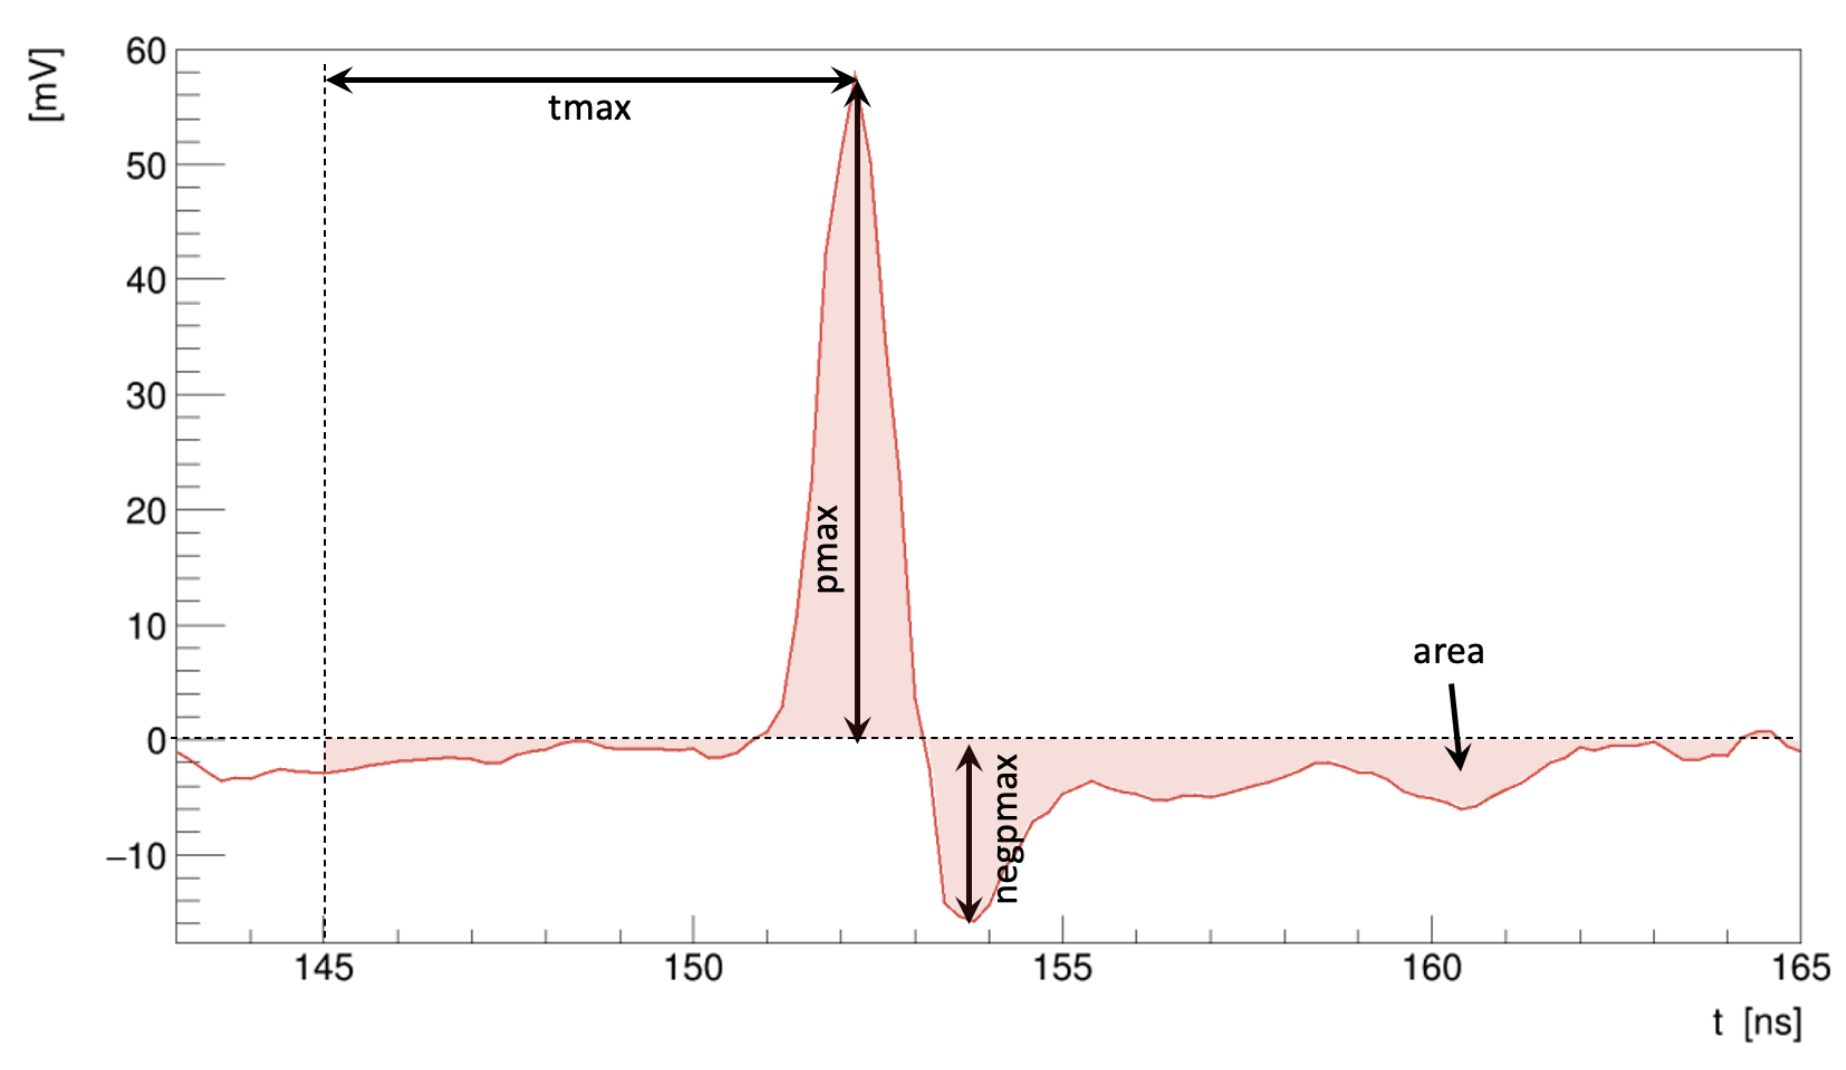

Figure 2: An example of a signal measured by one of the pads of a sensor, for a given event. The features extracted and considered for this study (pmax, negpmax, area and tmax) are shown.

For each signal measured by each of the 12 pads, some features are extracted and comprise the dataset. In particular:
- pmax[0], pmax[1], ... pmax[17]: the magnitude of the positive peak of the signal, in mV;
- negpmax[0], negpmax[1], ... negpmax[17]: the magnitude of the negative peak of the signal, in mV;
- tmax[0], tmax[1], ... tmax[17]: the delay (in ns) from a reference time when the positive peak of the signal occurs
- area[0], area[1], ... area[17]: the area under the signal;
- rms[0], rms[1], ... rms[17]: the [root mean square](https://en.wikipedia.org/wiki/Root_mean_square) (RMS) value of the signal;

Notice that 18 readings of each features are provided for each event, whereas only 12 pads are present in the sensor. This occurs because of hardware constraints in the data acquisition phase: a subset of the 18 features, as such, does not contain actual readings but rather noise.
For each event, the (x, y) coordinates (in μm) are the two targets to be predicted (x and y columns in the dataset).

The dataset is located at this URL: https://drive.google.com/file/d/1RqoGwJ7lkcXc7INE9hINUQZW2O8ltBcB/view?usp=drive_link.

Within the archive, you will find the following elements:
- development.csv (development set): a comma-separated values file containing the 385,500 events for the development set. This portion has the x, y coordinates to be predicted for each event. These two are the target values to be used to train and validate your models.
- evaluation.csv (evaluation set): a comma-separated values file containing the 128,500 events corresponding to the evaluation set. This portion does not contain the (x,y) coordinates.
- sample_submission.csv: a sample submission file.

### 2.2 Task

You are required to build a regression pipeline to predict the (x,y) coordinates, in μm. Do note that this is a multi-output regression problem (i.e., you are required to predict two separate outputs for each input). Do note that, in scikit-learn, many regression algorithms implemented already support multiple outputs
by default. Other algorithms instead can instead be extended by using a [MultiOutputRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html).

### 2.3 Evaluation metrics
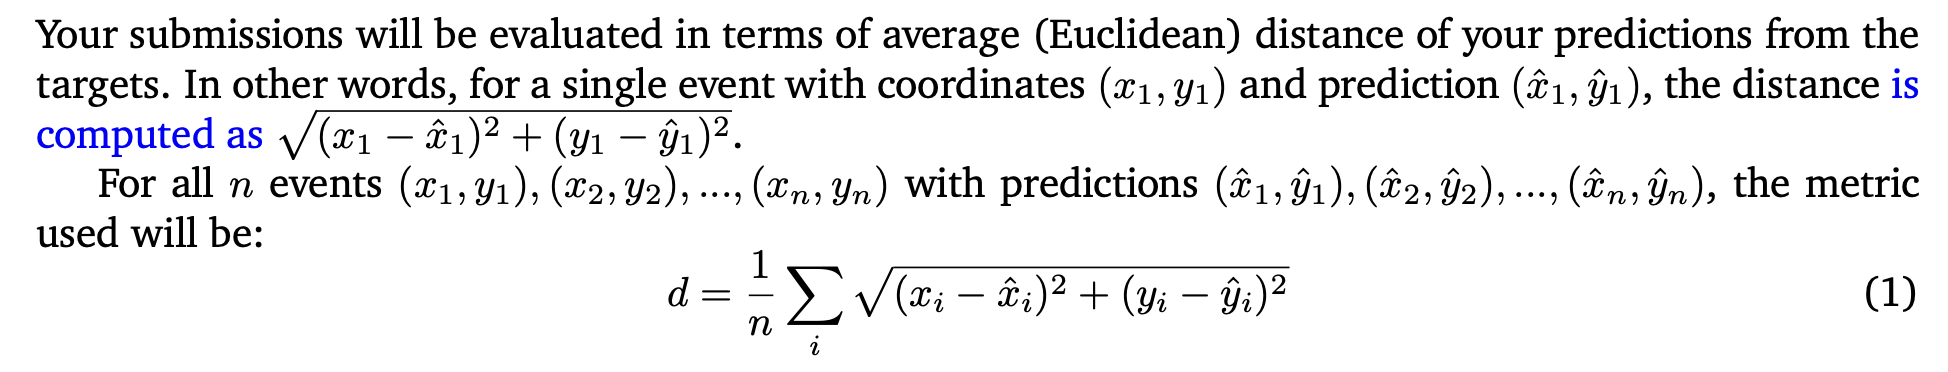

## Let's go!

Read the instruction in the `README.md` file to create a python virtual environment and install the requirements (matplotlib, scipy, pandas, scikit-learn).

Install requirements with `pip install -r requirements.txt`


### Downloading the dataset and exploring it.

In [1]:
# This cell works only on Linux and MacOS
# On Windows you need to download the dataset manually and unzip it
# Also make sure to have all the required libraries installed
!test -e DSL_Winter_Project_2024.zip || wget "https://drive.usercontent.google.com/download?id=1RqoGwJ7lkcXc7INE9hINUQZW2O8ltBcB&export=download&confirm=t" -O DSL_Winter_Project_2024.zip
!test -e DSL_Winter_Project_2024/development.csv || unzip DSL_Winter_Project_2024.zip && rm  -rf __MACOSX
!du -h ./DSL_Winter_Project_2024/*

566M	./DSL_Winter_Project_2024/development.csv
188M	./DSL_Winter_Project_2024/evaluation.csv
2.2M	./DSL_Winter_Project_2024/sample_submission.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
df_dev = pd.read_csv("DSL_Winter_Project_2024/development.csv")
print(f"Shape of development data: {df_dev.shape}")

Shape of development data: (385500, 92)


In [4]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385500 entries, 0 to 385499
Data columns (total 92 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   x            385500 non-null  float64
 1   y            385500 non-null  float64
 2   pmax[0]      385500 non-null  float64
 3   negpmax[0]   385500 non-null  float64
 4   area[0]      385500 non-null  float64
 5   tmax[0]      385500 non-null  float64
 6   rms[0]       385500 non-null  float64
 7   pmax[1]      385500 non-null  float64
 8   negpmax[1]   385500 non-null  float64
 9   area[1]      385500 non-null  float64
 10  tmax[1]      385500 non-null  float64
 11  rms[1]       385500 non-null  float64
 12  pmax[2]      385500 non-null  float64
 13  negpmax[2]   385500 non-null  float64
 14  area[2]      385500 non-null  float64
 15  tmax[2]      385500 non-null  float64
 16  rms[2]       385500 non-null  float64
 17  pmax[3]      385500 non-null  float64
 18  negpmax[3]   385500 non-

In [5]:
# Understanding the data
df_dev.head(5)

,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,200.0,200.0,4.066907,-17.690173,2.847932,0.600000,2.007042,5.409161,-17.721210,4.538778,...,607.109118,-36.282996,583.899899,72.373094,0.374498,614.916861,-39.848523,591.852768,72.331028,0.405595
1,200.0,200.0,5.916801,-4.717111,5.792778,79.765174,1.564535,4.414289,-4.736827,3.720435,...,630.348007,-39.715988,580.042799,71.029155,0.403258,624.950701,-41.266681,586.569646,71.089058,0.405890
2,200.0,200.0,4.286652,-5.316132,2.356390,74.600000,1.404622,4.567191,-5.985437,3.490490,...,613.880342,-40.679678,580.407491,71.892264,0.568777,596.437125,-42.712286,574.091695,71.943934,0.498019
3,200.0,200.0,4.003635,-4.617459,2.189005,43.000000,1.512162,5.019058,-4.229949,6.786200,...,600.714957,-43.206601,579.882635,72.357388,0.255483,591.763739,-50.681940,584.099483,72.333282,0.336454
4,200.0,200.0,4.448146,-4.848743,3.997002,196.667482,1.101113,3.250262,-5.783587,2.449456,...,609.723785,-43.570892,590.156125,71.249130,0.413855,606.917023,-49.923819,584.316142,71.242904,0.293824


In [6]:
print(f"Unique values in x: {sorted(df_dev['x'].unique())}")
print(f"Unique values in y: {sorted(df_dev['y'].unique())}")
print(f"Count of unique values in x: {len(df_dev['x'].unique())}")
print(f"Count of unique values in y: {len(df_dev['y'].unique())}")
# x&y are multiple of 5 in the range 200->600. So we have 81 unique values for x and y

Unique values in x: [200.0, 205.0, 210.0, 215.0, 220.0, 225.0, 230.0, 235.0, 240.0, 245.0, 250.0, 255.0, 260.0, 265.0, 270.0, 275.0, 280.0, 285.0, 290.0, 295.0, 300.0, 305.0, 310.0, 315.0, 320.0, 325.0, 330.0, 335.0, 340.0, 345.0, 350.0, 355.0, 360.0, 365.0, 370.0, 375.0, 380.0, 385.0, 390.0, 395.0, 400.0, 405.0, 410.0, 415.0, 420.0, 425.0, 430.0, 435.0, 440.0, 445.0, 450.0, 455.0, 460.0, 465.0, 470.0, 475.0, 480.0, 485.0, 490.0, 495.0, 500.0, 505.0, 510.0, 515.0, 520.0, 525.0, 530.0, 535.0, 540.0, 545.0, 550.0, 555.0, 560.0, 565.0, 570.0, 575.0, 580.0, 585.0, 590.0, 595.0, 600.0]
Unique values in y: [200.0, 205.0, 210.0, 215.0, 220.0, 225.0, 230.0, 235.0, 240.0, 245.0, 250.0, 255.0, 260.0, 265.0, 270.0, 275.0, 280.0, 285.0, 290.0, 295.0, 300.0, 305.0, 310.0, 315.0, 320.0, 325.0, 330.0, 335.0, 340.0, 345.0, 350.0, 355.0, 360.0, 365.0, 370.0, 375.0, 380.0, 385.0, 390.0, 395.0, 400.0, 405.0, 410.0, 415.0, 420.0, 425.0, 430.0, 435.0, 440.0, 445.0, 450.0, 455.0, 460.0, 465.0, 470.0, 475.0,

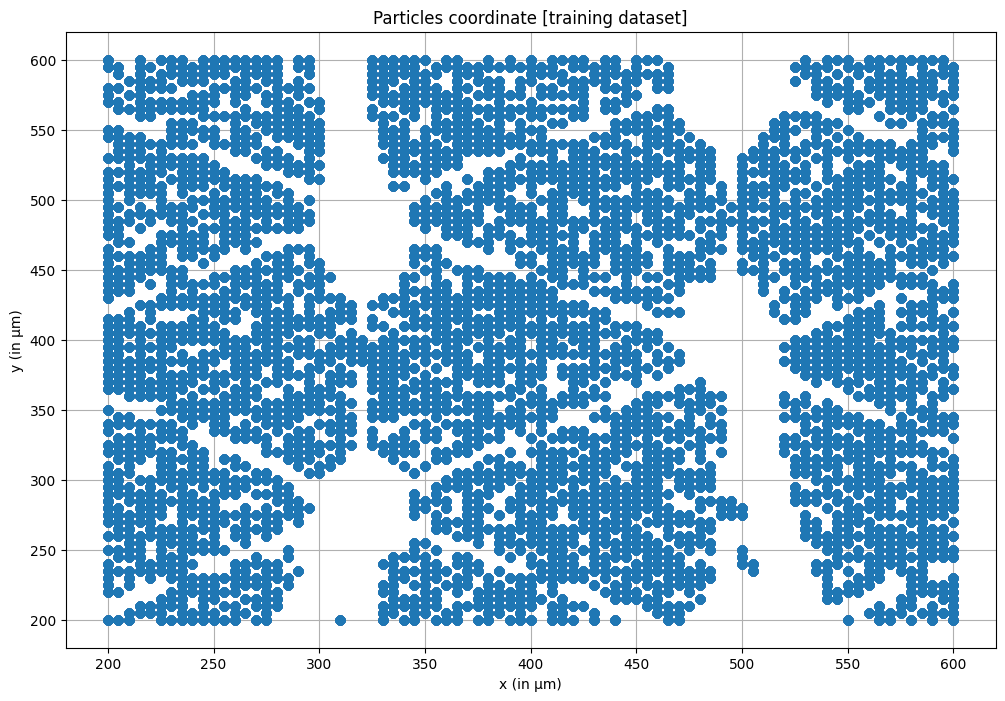

In [7]:
# Plotting the data, because why not?
# There are five distinct areas, or "holes", where there is an absence of data. Maybe these areas all under the pads
plot_dataset = df_dev.plot(x="x", y="y", style="o", grid=True, title="Particles coordinate [training dataset]", legend=False)
plot_dataset.set_xlabel("x (in μm)")
plot_dataset.set_ylabel("y (in μm)")
plot_dataset.get_figure().savefig('plot_dataset.pdf', format='pdf')

### Preprocessing
Removing features that are not useful for the model.
Different combinations of features have been tried, but the best results were obtained with the following features:

In [8]:
FEATURES_DROP_REGEX = "tmax|rms"
df_dev_chosed = df_dev[df_dev.columns.drop(list(df_dev.filter(regex=FEATURES_DROP_REGEX)))]

### Spliting the dataset into train and test

In [9]:
from sklearn.model_selection import train_test_split

print(f"Shape of development data: {df_dev.shape}")
X_dev = df_dev_chosed.drop(columns=["x", "y"]).values  # Removing values of x and y that are the target values

y_dev_f1 = df_dev.filter(["x"])["x"].values  # Target values for x (feature 1)
y_dev_f2 = df_dev.filter(["y"])["y"].values  # Target values for y (feature 2)

# DOC: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
test_size = 0.05 # Used 0.25, the switch to 0.05 for final submission
X_train_full, X_valid_full, y_train_f1, y_valid_f1, y_train_f2, y_valid_f2 = train_test_split(X_dev, y_dev_f1, y_dev_f2, test_size=test_size, shuffle=True, random_state=12)
print(f"Shapes: X_train={X_train_full.shape} - X_valid={X_valid_full.shape} -  y_train_f1={y_train_f1.shape} -  y_valid_f1={y_valid_f1.shape} -  y_train_f2={y_train_f2.shape} -  y_valid_f2={y_valid_f2.shape}")

Shape of development data: (385500, 92)
Shapes: X_train=(366225, 54) - X_valid=(19275, 54) -  y_train_f1=(366225,) -  y_valid_f1=(19275,) -  y_train_f2=(366225,) -  y_valid_f2=(19275,)


### Feature selection

We have 18 readings of each features. But we have only 12 pads in the sensor. This occurs because of hardware constraints in the data acquisition phase.

We have to exclude the readings of the pads that are not present in the sensor (noise). 

Different approaches have been tested:
- VarianceThreshold
- SelectKBest
- SelectFwe (Family-wise error rate)


DOC feature selection: https://scikit-learn.org/stable/modules/feature_selection.html

In [10]:
# from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFwe, f_regression
# Also tested with: SelectKBest(score_func=f_regression, k=60)

# Removes all low-variance features
# DOC: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html
# selector = VarianceThreshold(threshold=0.35)
# X_dev = selector.fit_transform(X_dev_full)

# DOC: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFwe.html
selector = SelectFwe(score_func=f_regression)
X_train = selector.fit_transform(X_train_full, y_train_f1)
X_valid = selector.transform(X_valid_full)

print(f"Shapes before and after feature selection:\nX_train={X_train_full.shape} -> {X_train.shape}\nX_valid={X_valid_full.shape} -> {X_valid.shape}")

Shapes before and after feature selection:
X_train=(366225, 54) -> (366225, 45)
X_valid=(19275, 54) -> (19275, 45)


MinMaxScaler have also been tested to scale the features between 0 and 1.

No significant improvement has been observed so we decided to not use it.

DOC MinMaxScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

### Evaluation metrics

For the evaluation on the portal a custom score will be used. This is the implementation:

In [11]:
# Evaluation metric implementation based on the formula defined in the assignment
def euclidean_dist_score(corrects: np.ndarray, predictions: np.ndarray) -> float:
    assert len(corrects) == len(predictions), "The length of the arrays are different"
    euclidean_dist = (corrects[:, 0] - predictions[:, 0])**2 + (corrects[:, 1] - predictions[:, 1])**2
    summation = np.sum(np.sqrt(euclidean_dist))
    return summation / len(corrects)

### Preprocessing the data
Different hyperparameters have been tested for the preprocessing of the data.
You can find more details in the README or in the final report.

In [12]:
from sklearn.metrics import r2_score
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# DOC: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#reg = RandomForestClassifier(
#    n_estimators=200,
#    criterion="gini",
#    max_features="sqrt", # Availables: "sqrt", "log2", default=1.0
#    random_state=12, # Seed, to reproduce results
#    verbose=1,
#    n_jobs=-1  # Use all the cores of the CPU!!!
#)
# DOC: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
reg = RandomForestRegressor(
    n_estimators=600,
    criterion="squared_error", # Availables: "squared_error", "absolute_error", "friedman_mse", "poisson", default=”squared_error”
    max_features=0.45, # Availables: "sqrt", "log2", default=1.0
    random_state=12, # Seed, to reproduce results
    verbose=1,
    n_jobs=-1  # Use all the cores of the CPU!!!
)

This step is done with the MultiOutputRegressor that is suggested in the assignment.

In [13]:
# Merge the 2 features array in one for MultiOutputRegressor
y_train_f1_f2 = pd.DataFrame({"x": y_train_f1, "y": y_train_f2}, columns=["x", "y"]).values
y_valid_f1_f2 = pd.DataFrame({"x": y_valid_f1, "y": y_valid_f2}, columns=["x", "y"]).values
print(f"Shape of y_train_f1_f2: {y_train_f1_f2.shape}")
print(f"Shape of y_valid_f1_f2: {y_valid_f1_f2.shape}")

Shape of y_train_f1_f2: (366225, 2)
Shape of y_valid_f1_f2: (19275, 2)


In [14]:
from sklearn.multioutput import MultiOutputRegressor

# DOC: https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html
# EXAMPLE: https://scikit-learn.org/stable/auto_examples/ensemble/plot_random_forest_regression_multioutput.html
reg_multirf = MultiOutputRegressor(
    reg,
    n_jobs=-1  # Use all the cores of the CPU!!!
)
reg_multirf.fit(X_train , y_train_f1_f2)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 20.0min finished
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 20.4min finished


MultiOutputRegressor(estimator=RandomForestRegressor(max_features=0.45,
                                                     n_estimators=600,
                                                     n_jobs=-1, random_state=12,
                                                     verbose=1),
                     n_jobs=-1)

### Validation

In [15]:
print("Making magic...")
pred = reg_multirf.predict(X_valid)
print("Done.")
r2 = r2_score(y_valid_f1_f2, pred)
print(f"R2 score: {r2:.8f}")
ed = euclidean_dist_score(y_valid_f1_f2, pred)
print(f"Euclidean distance score: {ed:.3f}")

Making magic...


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.6s
[Parallel(n_jobs=10)]: Done 600 out of 600 | elapsed:    2.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.9s
[Parallel(n_jobs=10)]: Done 600 out of 600 | elapsed:    1.3s finished


Done.
R2 score: 0.99911044
Euclidean distance score: 4.099


## Predicting the evaluation set

In [16]:
# Loading the evaluation data
df_eval = pd.read_csv("DSL_Winter_Project_2024/evaluation.csv", index_col=0)
print(f"Shape of evaluation data: {df_eval.shape}")

Shape of evaluation data: (128500, 90)


In [17]:
df_eval.head(3)

,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],tmax[1],rms[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
Id,,,,,,,,,,,,,,,,,,,,,
0,4.400616,-4.257770,2.860212,176.600000,1.562814,8.738040,-3.598874,5.554105,70.800000,0.729175,...,614.621212,-42.232574,583.237137,70.69353,0.861022,608.931417,-42.728827,568.019556,70.755552,0.328075
1,5.599571,-2.974570,9.400537,90.677386,1.129626,23.460358,-20.616669,17.998419,72.800000,1.258335,...,520.333440,-36.986118,550.540448,72.78139,0.259205,613.671695,-44.449564,586.292097,72.900695,0.401326
2,3.731995,-5.662292,1.930957,155.200000,0.921757,4.837952,-7.224267,3.289124,67.057395,0.793541,...,607.642389,-46.680069,582.825835,71.40732,0.552691,608.996069,-45.877765,589.520958,71.406020,0.343592


In [18]:
# Apply the same transformation
df_eval_chosed = df_eval[df_eval.columns.drop(list(df_eval.filter(regex=FEATURES_DROP_REGEX)))]
values_to_predics = selector.transform(df_eval_chosed.values)
predictions = reg_multirf.predict(values_to_predics)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.5s
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    4.8s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 600 out of 600 | elapsed:    7.2s finished
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 600 out of 600 | elapsed:    6.7s finished


In [19]:
print(predictions[:3])

[[487.525      327.625     ]
 [552.08333333 575.88333333]
 [207.61666667 395.85833333]]


In [20]:
result = [f"{p[0]:.2f}|{p[1]:.2f}" for p in predictions]
print(result[:3])

['487.52|327.62', '552.08|575.88', '207.62|395.86']


In [21]:
# Saving the result in a CSV file
pd.DataFrame(result, index=df_eval.index).to_csv("output_vellons.csv", index_label="Id", header=["Predicted"])
# Local score is 4.099 with 600 estimators
# Submission score is 4.710 with 600 estimators

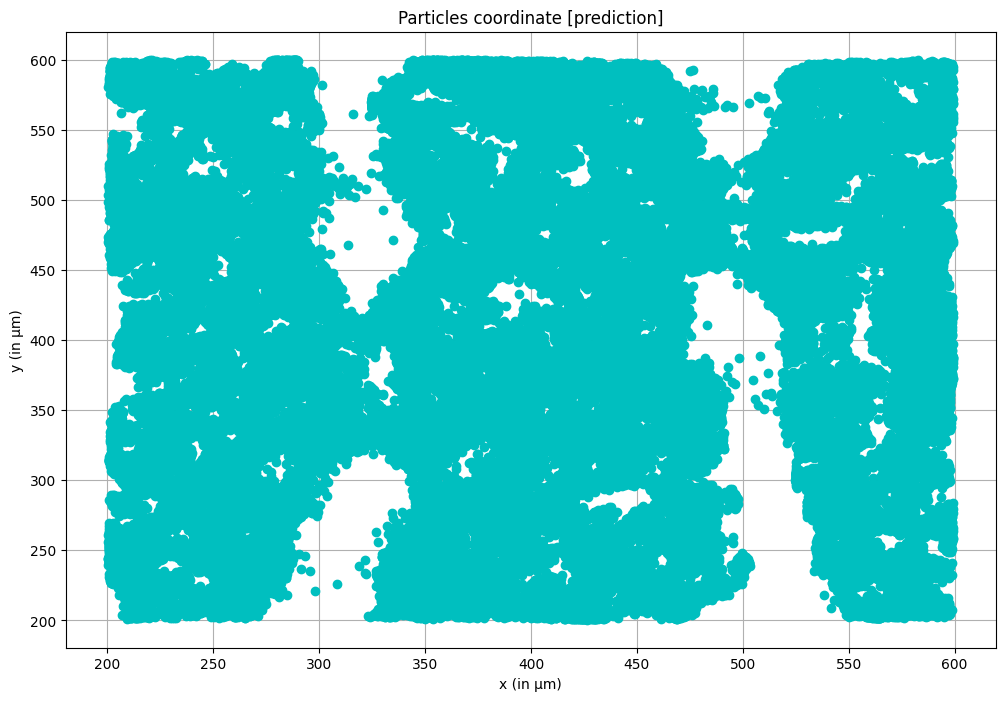

In [22]:
# Plotting the predicted coordinates.
# As we can see, using a Random Forest Regressor, the predicted coordinates are all over the cartesian plane
# and not in position that are multiple of 5 (as we have seen in the training set).
# Also in this case we can see five distinct areas where there is an absence of data.
df_eval_pred = df_eval.copy()
df_eval_pred.insert(0, "x_pred", predictions[:, 0], True)
df_eval_pred.insert(1, "y_pred", predictions[:, 1], True)
plot_prediction = df_eval_pred.plot(x="x_pred", y="y_pred", style="o", color="c", grid=True, title="Particles coordinate [prediction]", legend=False)
plot_prediction.set_xlabel("x (in μm)")
plot_prediction.set_ylabel("y (in μm)")
plot_prediction.get_figure().savefig('plot_prediction.pdf', format='pdf')